In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from collections import defaultdict
import scipy.io as sio

This project aims to recover the original binary image from a noisy version using a Markov Random Field (MRF). Each pixel in the noisy image has a 0.1 probability of flipping. The task is to minimize the following energy function to estimate the real pixel values:

$$E=\alpha \sum_i  x_i  -\beta \sum_{i,j}x_{i}x_{j} -\gamma \sum_i x_i y_i$$

Steps:<br>
	1.	Initialization: Start with the noisy pixel values as the initial guess for the real image.<br>
	2.	Energy Minimization: Sequentially flip pixel values (+1 or -1) to minimize the energy function until convergence.<br>
	3.	Output: Display the recovered image and report the accuracy.

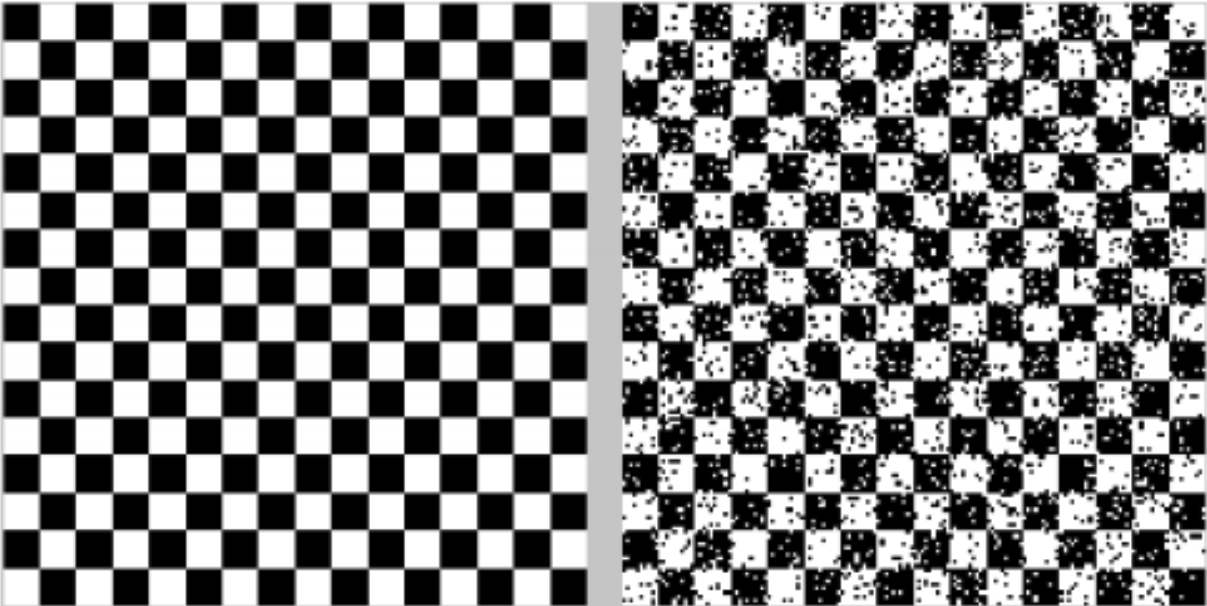

In [ ]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

class MarkovRandomFieldDenoising:
    def __init__(self, image_file):
        self.load_data(image_file)
        self.initialize_parameters()

    def load_data(self, image_file):
        data = sio.loadmat(image_file)
        self.noisy_image = np.where(data['noisy_image'] == 0, -1, 1)
        self.true_image = np.where(data['original_image'] == 0, -1, 1)

    def initialize_parameters(self):
        self.alpha = 0.2
        self.beta = 1.0
        self.gamma = 2.0

    def energy_function(self, image):
        energy = self.alpha * np.sum(image)
        energy -= self.beta * np.sum(image[:-1, :] * image[1:, :]) + np.sum(image[:, :-1] * image[:, 1:])
        energy -= self.gamma * np.sum(image * self.noisy_image)
        return energy

    def denoise_image(self):
        denoised_image = self.noisy_image.copy()
        converged = False
        while not converged:
            converged = True
            for i in range(denoised_image.shape[0]):
                for j in range(denoised_image.shape[1]):
                    original_value = denoised_image[i, j]
                    denoised_image[i, j] = 1
                    energy_plus = self.energy_function(denoised_image)
                    denoised_image[i, j] = -1
                    energy_minus = self.energy_function(denoised_image)
                    if energy_plus < energy_minus:
                        denoised_image[i, j] = 1
                    else:
                        denoised_image[i, j] = -1
                    if denoised_image[i, j] != original_value:
                        converged = False
        return denoised_image

    def compute_accuracy(self, denoised_image):
        accuracy = np.mean(denoised_image == self.true_image)
        return accuracy

    def plot_images(self, denoised_image):
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 3, 1)
        plt.title('Noisy Image')
        plt.imshow(self.noisy_image, cmap='gray')
        plt.subplot(1, 3, 2)
        plt.title('True Image')
        plt.imshow(self.true_image, cmap='gray')
        plt.subplot(1, 3, 3)
        plt.title('Denoised Image')
        plt.imshow(denoised_image, cmap='gray')
        plt.show()


Accuracy: 0.9582421875


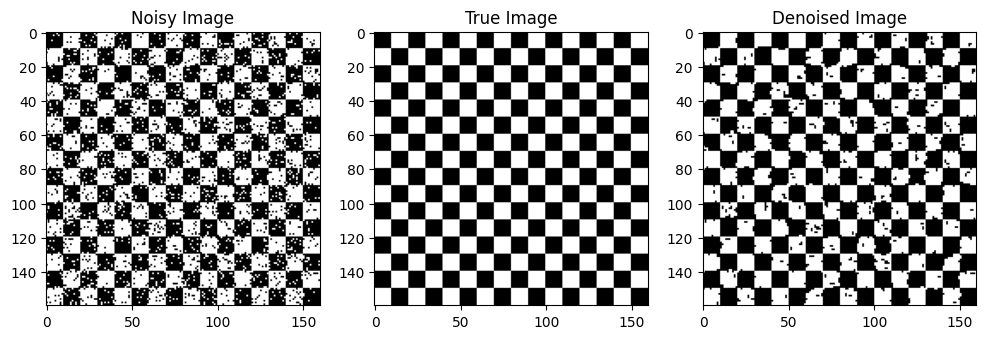

In [23]:
image_file = 'HW1_image.mat'
mrf_denoising = MarkovRandomFieldDenoising(image_file)
denoised_image = mrf_denoising.denoise_image()
accuracy = mrf_denoising.compute_accuracy(denoised_image)
print("Accuracy:", accuracy)
mrf_denoising.plot_images(denoised_image)


Accuracy: 0.9582421875


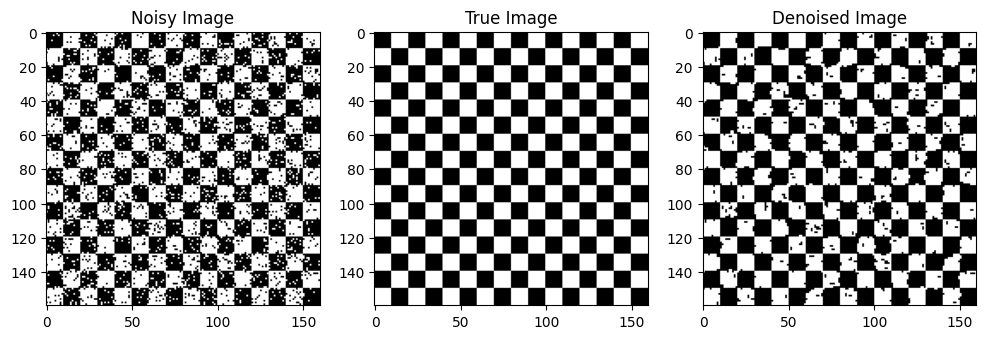

In [24]:
mrf_denoising.alpha = 0.1
denoised_image = mrf_denoising.denoise_image()
accuracy = mrf_denoising.compute_accuracy(denoised_image)
print("Accuracy:", accuracy)
mrf_denoising.plot_images(denoised_image)

Accuracy: 0.9582421875


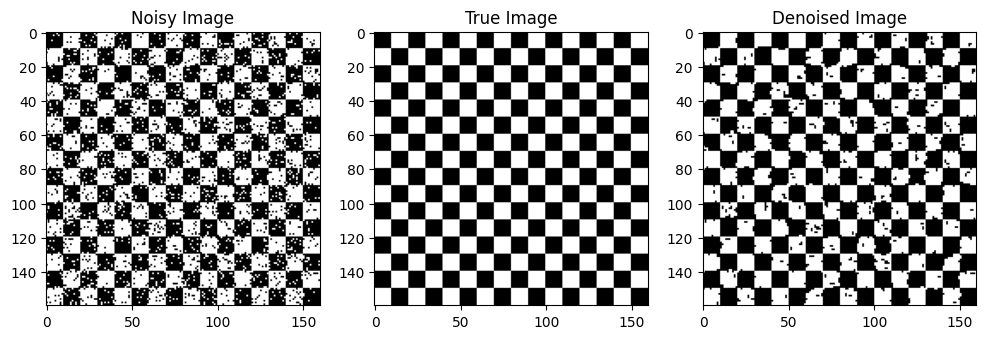

In [28]:
mrf_denoising.alpha = 0.5
denoised_image = mrf_denoising.denoise_image()
accuracy = mrf_denoising.compute_accuracy(denoised_image)
print("Accuracy:", accuracy)
mrf_denoising.plot_images(denoised_image)

Accuracy: 0.9569140625


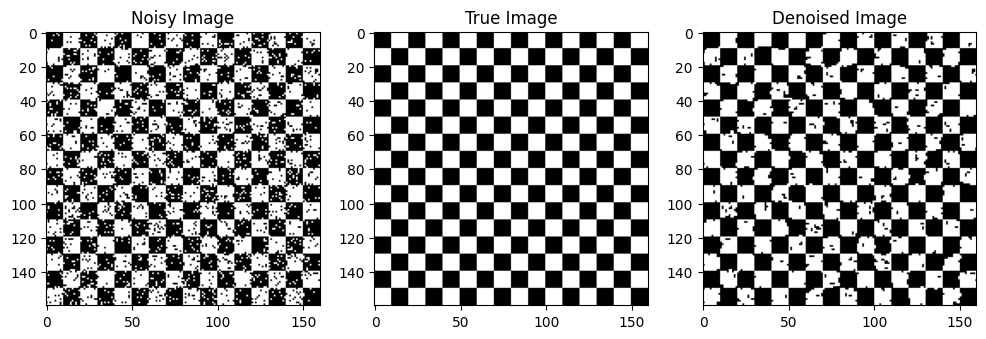

In [26]:
mrf_denoising.alpha = 1
denoised_image = mrf_denoising.denoise_image()
accuracy = mrf_denoising.compute_accuracy(denoised_image)
print("Accuracy:", accuracy)
mrf_denoising.plot_images(denoised_image)

Accuracy: 0.5


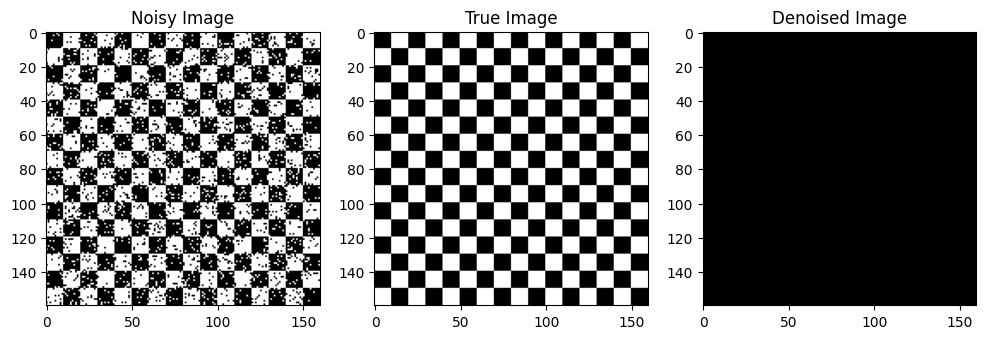

In [27]:
mrf_denoising.alpha = 2
denoised_image = mrf_denoising.denoise_image()
accuracy = mrf_denoising.compute_accuracy(denoised_image)
print("Accuracy:", accuracy)
mrf_denoising.plot_images(denoised_image)

### Parameter Effects in MRF Denoising

#### \(alpha\): Bias Term
- **Increased \(\alpha\)**: Leads to a darker image by penalizing "on" pixels. Very high values can result in a mostly black image.
- **Decreased \(\alpha\)**: Allows more "on" pixels, making the image brighter but potentially noisier.

#### \(beta\): Smoothness Term
- **Increased \(\beta\)**: Promotes smoothness by making neighboring pixels similar, which can blur details if too high.
- **Decreased \(\beta\)**: Preserves edges and details by reducing neighbor influence, though it may result in a noisier image.

#### \(gamma\): Fidelity to Noisy Image
- **Increased \(\gamma\)**: Makes the denoised image more faithful to the noisy original, retaining details but possibly keeping some noise.
- **Decreased \(\gamma\)**: Allows more noise reduction by deviating from the noisy values, but may lose fine details.

